In [103]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
repos_info = pd.read_csv('repos_info.csv')
commit = pd.read_csv('commit_info.csv')

In [105]:
commit_count = pd.merge(repos_info,commit,on=['Id']).groupby('Id').size().reset_index()

In [106]:
commit_count.columns = ['Id', 'Commit count']

In [107]:
repos_info = pd.merge(repos_info,commit_count,on=['Id'],how = 'left')
#repos_info

Text(0.5,1,'Commits per repository')

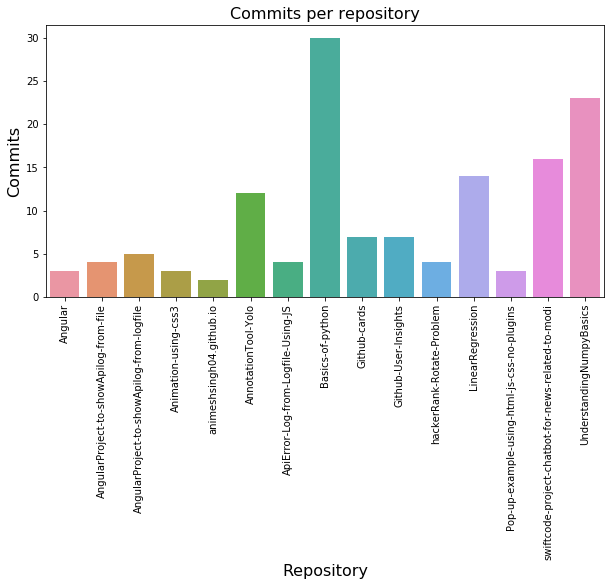

In [108]:
plt.figure(figsize = (10,5))
sns.barplot(repos_info['Name'], repos_info['Commit count'])
plt.xticks(rotation = 90)
plt.xlabel("Repository", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per repository", fontsize = 16)

In [240]:
commit['Year'] = commit['Commited on'].apply(lambda x: x[:4])
commit_year = commit['Commited on'].apply(lambda x: x[:4]).value_counts()
commit_year.values

array([120,  16,   1], dtype=int64)

Text(0.5,1,'Commits per Year')

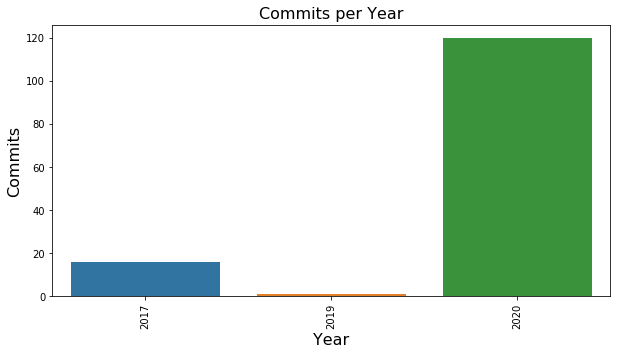

In [241]:
plt.figure(figsize = (10,5))
sns.barplot(commit_year.index, commit_year.values)
plt.xticks(rotation = 90)
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Commits", fontsize = 16)
plt.title("Commits per Year", fontsize = 16)

# Commits Each Month 

In [290]:
commit['Month'] = commit['Commited on'].apply(lambda x: x[5:7])
monthly_commits = commit[commit['Year']=='2020'].groupby('Month').count()['Id']

In [275]:
month_mapper = { '01': 'January', '02': 'February', '03': 'March', '04': 'April', '05': 'May', '06': 'June',
                '07': 'July', '08': 'August', '09': 'September', '10': 'October', '11': 'Novmeber', '12': 'December'
               }

In [276]:
labels = []
for value in monthly_commits.index:
    labels.append(month_mapper[value])

Text(0.5,1,'Commits per Month')

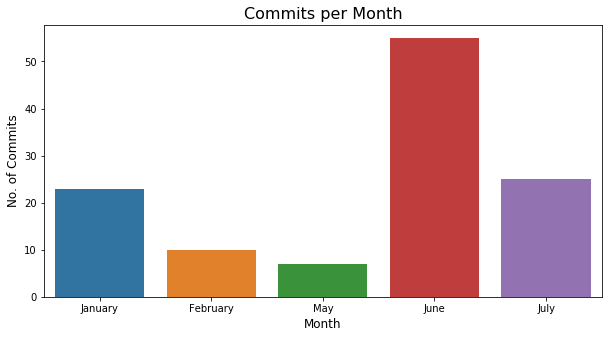

In [277]:
plt.figure(figsize = (10,5))
plot = sns.barplot(monthly_commits.index, monthly_commits.values)
plot.set_xticklabels(labels)
plt.xlabel("Month", fontsize = 12)
plt.ylabel("No. of Commits", fontsize = 12)
plt.title("Commits per Month", fontsize = 16)

# Commits Each Day of the Month

In [286]:
commit['Date'] = commit['Commited on'].apply(lambda x: x[0:10])
Daily_commits = commit[(commit['Year']=='2020')].groupby('Date').size()

In [287]:
date_labels=[]
for value in Daily_commits.index:
    date_labels.append(value)

Text(0.5,1,'Daily Commits on Each Day')

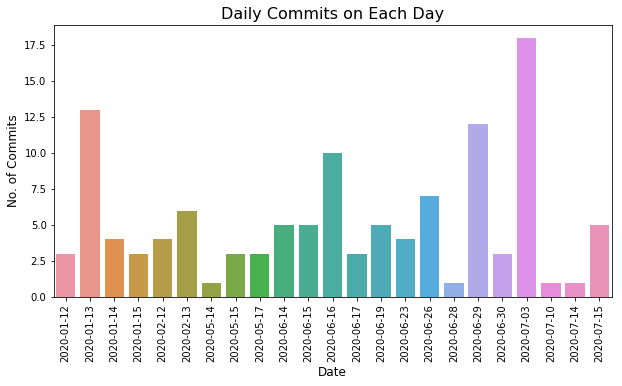

In [289]:
plt.figure(figsize = (10,5))
plot = sns.barplot(Daily_commits.index, Daily_commits.values)
plot.set_xticklabels(date_labels)
plt.xticks(rotation = 90)
plt.xlabel("Date", fontsize = 12)
plt.ylabel("No. of Commits", fontsize = 12)
plt.title("Daily Commits on Each Day", fontsize = 16)